In [110]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

## __1 - Business Problem__  
___Build a naive Bayes model on the data set for classifying the ham and spam___  

## __2 - Data collection and description__ 

In [37]:
df = pd.read_csv("C:/Users/SohailShaikh/OneDrive - tiqets.com/Tiqets/Adhoc/DS/Naive Bayes/sms_raw_NB.csv",encoding = "ISO-8859-1")

In [38]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [39]:
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [40]:
df.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4812   4503                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [41]:
df['length']=df['text'].apply(len)

In [42]:
df.head()

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",150
4,spam,okmail: Dear Dave this is your final notice to...,161


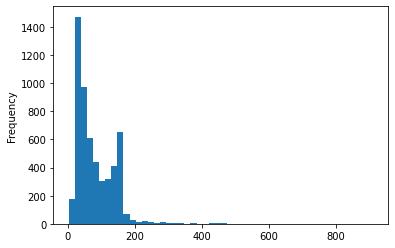

In [44]:
df['length'].plot(bins=50,kind='hist')

In [45]:
df.length.describe()

count    5559.000000
mean       79.893326
std        59.200791
min         2.000000
25%        35.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [46]:
df[df['length']==910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

## __3 - Data cleaning__ 

In [53]:
df1 = df.copy()

#### __3.1 - Removing punctuation and Stop words__ 

In [49]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [54]:
df1['text'] = df1['text'].apply(text_process)

In [55]:
df1.head()

,type,text,length
0,ham,"[Hope, good, week, checking]",49
1,ham,"[Kgive, back, thanks]",23
2,ham,"[also, cbe, pay]",43
3,spam,"[complimentary, 4, STAR, Ibiza, Holiday, å£100...",150
4,spam,"[okmail, Dear, Dave, final, notice, collect, 4...",161


#### __3.2 - Converting text into a vector as input for SciKit algorithm__ 

In [57]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df1['text'])

In [58]:
print(len(bow_transformer.vocabulary_))

5100


In [60]:
exm_txt = df1['text'][3]

In [85]:
bow = (bow_transformer.transform([exm_txt]))
bow.shape

(1, 5100)

In [65]:
bow_transformer.get_feature_names()[4073]

'leftalreadyorchard'

In [73]:
txt_bow = bow_transformer.transform(df1['text'])

In [74]:
print('Shape of Sparse Matrix: ',txt_bow.shape)
print('Amount of non-zero occurences:',txt_bow.nnz)

Shape of Sparse Matrix:  (5559, 5100)
Amount of non-zero occurences: 5554


In [75]:
sparsity =(100.0 * txt_bow.nnz/(txt_bow.shape[0]*txt_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


#### __3.3 - Normalization text with TF-IDF__ 

In [76]:
tfidf_transformer=TfidfTransformer().fit(txt_bow)

In [87]:
tfidf_eg = tfidf_transformer.transform(bow)

In [88]:
txt_tfidf=tfidf_transformer.transform(txt_bow)
print(txt_tfidf.shape)

(5559, 5100)


## __4 - Naive Bayes__ 

In [133]:
x_train,x_test,y_train,y_test = train_test_split(df1['text'],df1['type'],test_size=0.2)

In [134]:
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [135]:
pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001EB5DCB7A68>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [136]:
predictions = pipeline.predict(x_test)

In [137]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.86      0.93      1112
        spam       0.00      0.00      0.00         0

    accuracy                           0.86      1112
   macro avg       0.50      0.43      0.46      1112
weighted avg       1.00      0.86      0.93      1112



C:\Users\SohailShaikh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## __5 - Conclusion__ 

### The MultinomialNB classifier has an accuracy of 86%